## Portfolio Analysis
To try this portfolio analysis with your own transaction data, you can upload your data file (portfolio_data.xlsx) here and then click "Run all." Please note that this is a temporary environment, which means it won't save your work after you close the browser.

However, it's important to be aware that this is a public environment, and we cannot guarantee the security of the data you upload. So, please use it with caution and avoid uploading sensitive information.

Learn more about MyBinder's privacy policy here: [MyBinder Privacy Policy](https://fr.mybinder.io/privacy)

In [1]:
# install required library
!pip install openbb==2.5.1
!pip install pandas==1.5.2
!pip install quantstats==0.0.62

  Using cached ipython-8.5.0-py3-none-any.whl (752 kB)
  Using cached backcall-0.2.0-py2.py3-none-any.whl (11 kB)


ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: 'c:\\users\\yongsheng.tan\\appdata\\local\\miniconda3\\envs\\my_quant_lab\\lib\\site-packages\\pickleshare-0.7.5.dist-info\\METADATA'



In [2]:
# import necessary libraries
import pandas
import quantstats as qs 
from openbb_terminal.sdk import openbb
import warnings

# ignore warnings
warnings.filterwarnings("ignore")

In [3]:
# settings to locate excel path
excel_file_path = "./portfolio_data.xlsx" # change to your input excel path
benchmark_symbol = "0820EA.KL" # change the benchmark you want, for example SPYs

In [4]:
# Load portfolio data from ".xlsx" excel file 
p = openbb.portfolio.load(transactions_file_path = excel_file_path)
p.set_benchmark(benchmark_symbol) # set benchmark

## calculate daily return of your portfolio
daily_returns = openbb.portfolio.dret(portfolio_engine=p) 

## change the date string to datetime format
daily_returns.index = pandas.to_datetime(daily_returns.index) 

## change the column name from "benchmark" to the benchmark symbol you set
daily_returns.rename(columns={"benchmark":benchmark_symbol}, inplace=True) 

                           Benchmark    Strategy
-------------------------  -----------  ----------
Start Period               2018-09-24   2018-09-24
End Period                 2024-02-02   2024-02-02
Risk-Free Rate             0.0%         0.0%
Time in Market             45.0%        100.0%

Cumulative Return          -5.94%       124.27%
CAGR﹪                     -0.79%       10.96%

Sharpe                     0.02         0.58
Prob. Sharpe Ratio         51.7%        90.9%
Smart Sharpe               0.02         0.52
Sortino                    0.03         0.8
Smart Sortino              0.02         0.71
Sortino/√2                 0.02         0.56
Smart Sortino/√2           0.02         0.5
Omega                      1.12         1.12

Max Drawdown               -27.02%      -56.04%
Longest DD Days            1948         1224
Volatility (ann.)          16.86%       37.98%
R^2                        0.0          0.0
Information Ratio          0.03         0.03
Calmar               

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2018-10-02,2018-12-24,2020-02-13,500,-56.038443,-54.474803
2,2020-02-20,2020-03-16,2020-05-08,79,-37.554035,-35.512773
3,2020-09-03,2022-12-28,2024-01-09,1224,-35.206942,-33.415302
4,2020-06-11,2020-06-11,2020-06-19,9,-6.090711,-4.636082
5,2020-05-26,2020-05-28,2020-06-08,14,-5.974244,-5.550470


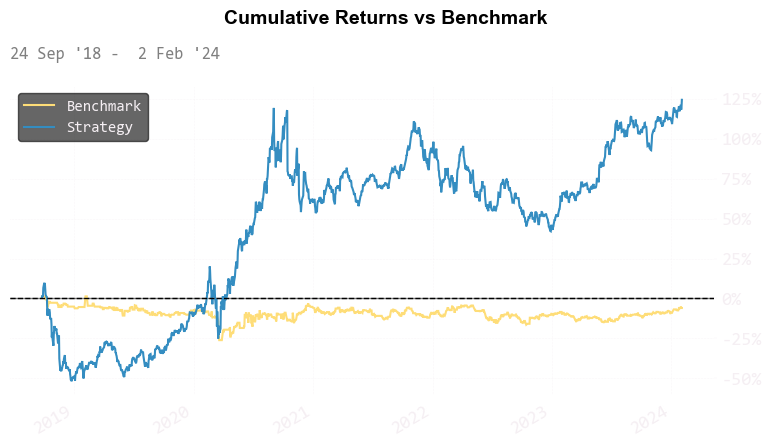

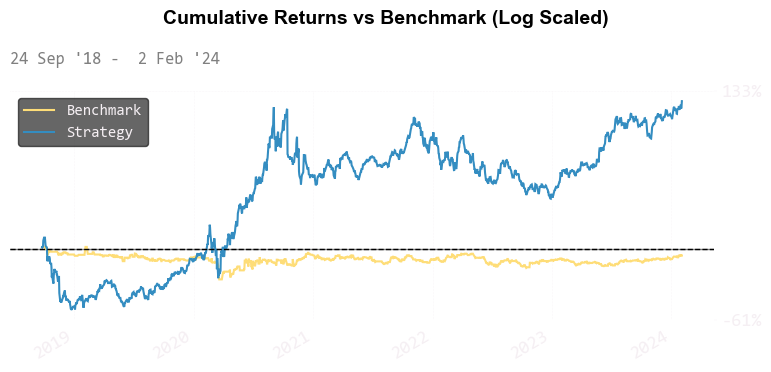

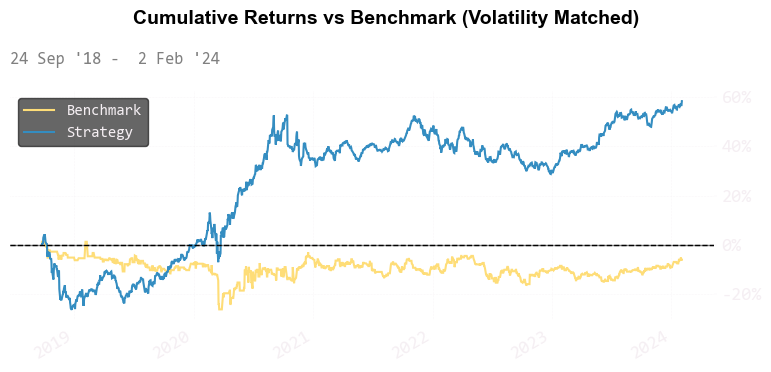

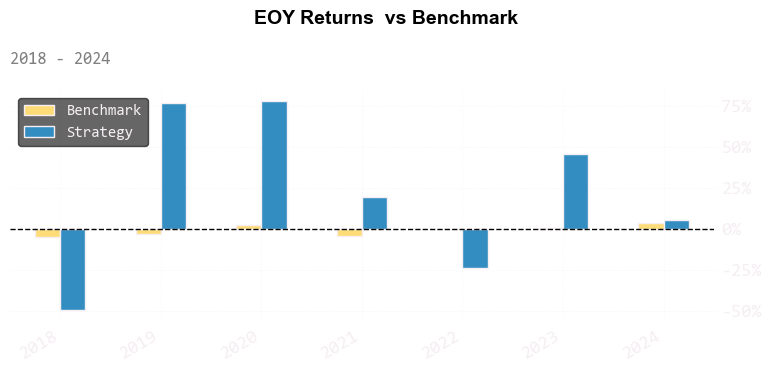

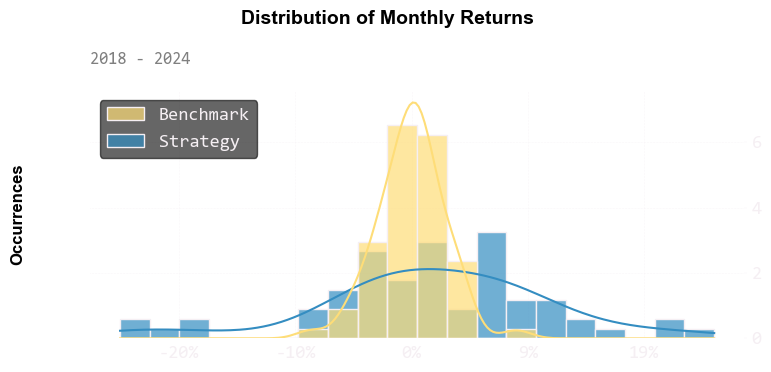

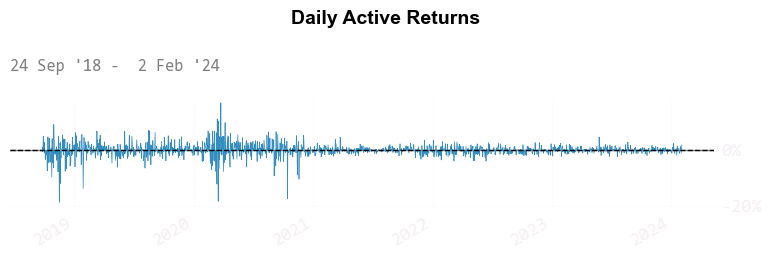

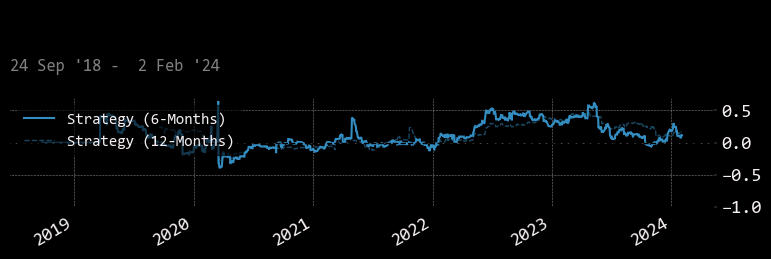

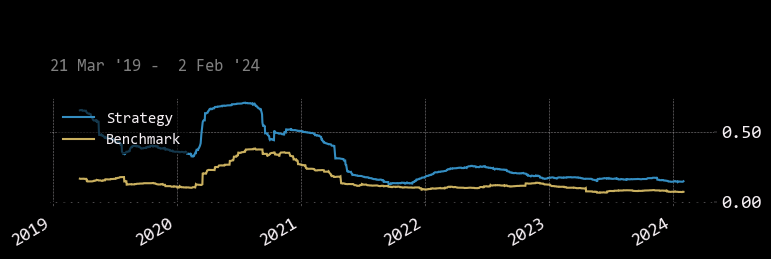

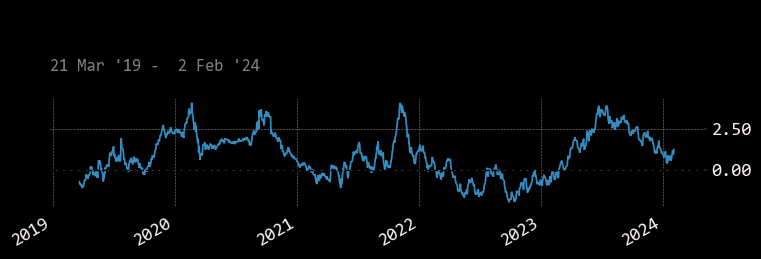

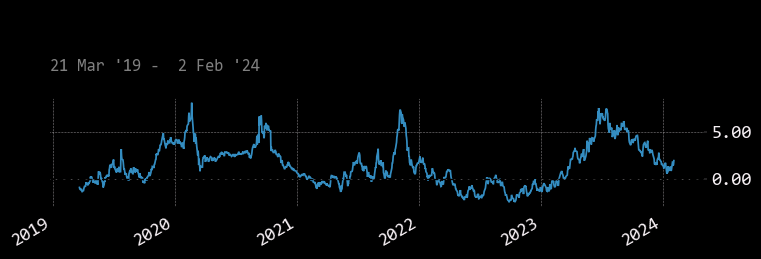

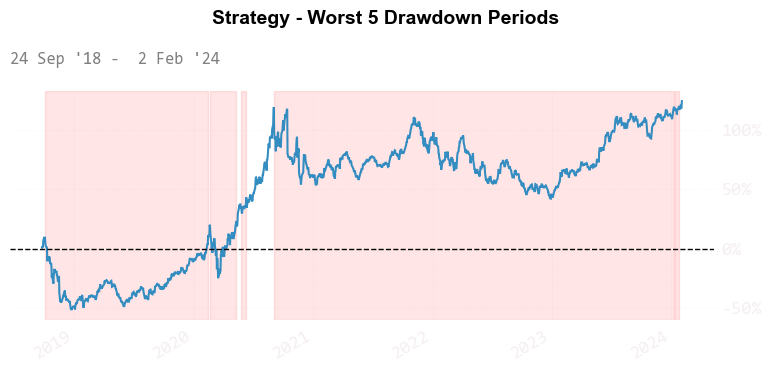

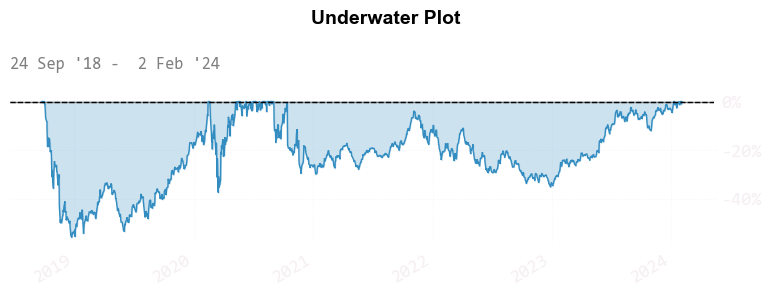

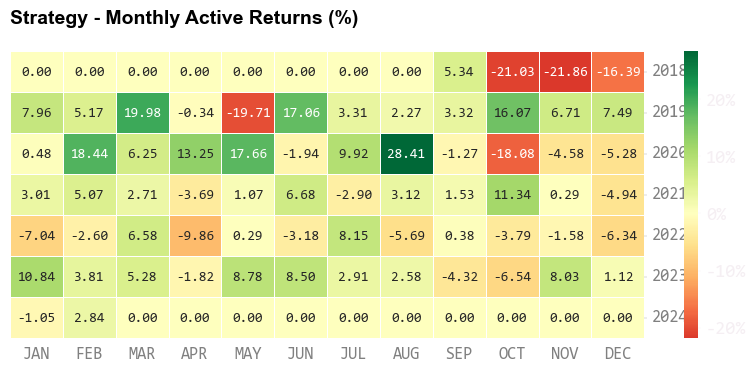

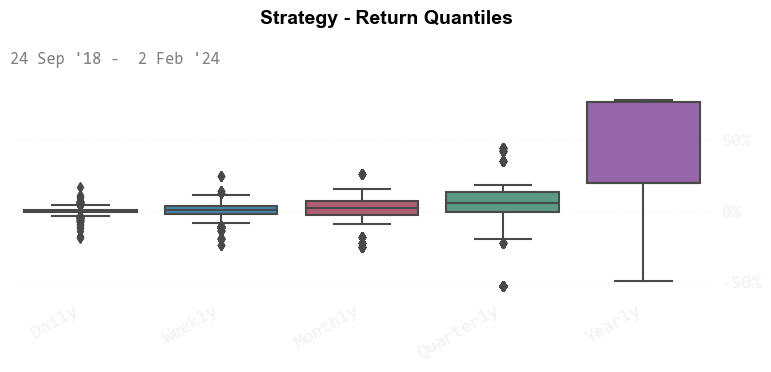

In [5]:
qs.reports.full(returns=daily_returns["portfolio"], 
                benchmark=daily_returns[benchmark_symbol])

## Computing environment

In [6]:
%load_ext watermark

%watermark -v -m -p jupyterlab,pandas,quantstats,openbb,watermark

# date
%watermark -u -n -t -z

Python implementation: CPython
Python version       : 3.10.12
IPython version      : 8.20.0

jupyterlab: 3.6.6
pandas    : 1.5.2
quantstats: 0.0.62
openbb    : not installed
watermark : 2.4.3

Compiler    : MSC v.1916 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 142 Stepping 12, GenuineIntel
CPU cores   : 8
Architecture: 64bit

Last updated: Sat Feb 03 2024 12:43:05Malay Peninsula Standard Time

